In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import itertools
import pylab
import pandas.rpy.common as com
% matplotlib inline
%load_ext rpy2.ipython

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html


In [2]:
def prettify_ax(ax):
    """
    Nifty function we can use to make our axes more pleasant to look at
    """
    for spine in ax.spines.itervalues():
        spine.set_visible(False)
    ax.set_frameon=True
    ax.patch.set_facecolor('#eeeeef')
    ax.grid('on', color='w', linestyle='-', linewidth=1)
    ax.tick_params(direction='out')
    ax.set_axisbelow(True)
    
def simple_ax(figsize=(6,4), **kwargs):
    """
    Shortcut to make and 'prettify' a simple figure with 1 axis
    """
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, **kwargs)
    prettify_ax(ax)
    return fig, ax

In [3]:
## fastq reads are here /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq
## file names
"""
mutant-shield1_S10.R1.fastq.gz	wildtype-shield1_S4.R1.fastq.gz
mutant-shield2_S11.R1.fastq.gz	wildtype-shield2_S5.R1.fastq.gz
mutant-shield3_S12.R1.fastq.gz	wildtype-shield3_S6.R1.fastq.gz
mutant-sphere1_S7.R1.fastq.gz	wildtype-sphere1_S1.R1.fastq.gz
mutant-sphere2_S8.R1.fastq.gz	wildtype-sphere2_S2.R1.fastq.gz
mutant-sphere3_S9.R1.fastq.gz	wildtype-sphere3_S3.R1.fastq.gz
"""

'\nmutant-shield1_S10.R1.fastq.gz\twildtype-shield1_S4.R1.fastq.gz\nmutant-shield2_S11.R1.fastq.gz\twildtype-shield2_S5.R1.fastq.gz\nmutant-shield3_S12.R1.fastq.gz\twildtype-shield3_S6.R1.fastq.gz\nmutant-sphere1_S7.R1.fastq.gz\twildtype-sphere1_S1.R1.fastq.gz\nmutant-sphere2_S8.R1.fastq.gz\twildtype-sphere2_S2.R1.fastq.gz\nmutant-sphere3_S9.R1.fastq.gz\twildtype-sphere3_S3.R1.fastq.gz\n'

## Making the index

In [ ]:
%%writefile ./zfish_index.sh
#!/bin/bash

#SBATCH -n 1                            #Number of cores
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=8000                      

#SBATCH -t 05:00:00
#SBATCH -p serial_requeue

#SBATCH -o ./index_output
#SBATCH -e ./index_errors
#SBATCH --mail-type=ALL
#SBATCH --mail-user=koobad@college.harvard.edu

# --------------
source /n/scrb152/setup.sh
~/software/subread-1.4.6-p3-source/bin/subread-buildindex  /n/schierfs1/projects/nanog2016/zebrafish.fa -o /n/schierfs1/projects/nanog2016/zebrafish.subread_index


In [ ]:
%%bash
sbatch ./zfish_index.sh

## Align the reads

In [4]:
%%writefile ./zebrafish_subjunc.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=12000                     

#SBATCH -t 180
#SBATCH -p serial_requeue                

#SBATCH -o index_output
#SBATCH -e index_error
#SBATCH --mail-type=ALL
#SBATCH --mail-user=armonrahim@college.harvard.edu

# --------------
# Fill this part out (and the specific fields above)
source /n/scrb152/setup.sh
# cd /scratch
~/software/subread-1.4.6-p3-source/bin/subjunc \
        --index /n/schierfs1/projects/nanog2016/zebrafish.subread_index \
        --read /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq/mutant-shield1_S10.R1.fastq.gz \
        --output /n/schierfs1/projects/nanog2016/mutant-shield1_S10.R1.bam  \
        --BAMoutput \
        --gzFASTQinput \
        --threads 4 \
        -H \
        -n 14 \
        --allJunctions

Overwriting ./zebrafish_subjunc.sh


In [5]:
%%bash
sbatch ./zebrafish_subjunc.sh

Submitted batch job 59426617


In [19]:
%%writefile ./zebrafish_subjunc_all_2.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=12000                     

#SBATCH -t 180
#SBATCH -p serial_requeue                

#SBATCH -o index_output2
#SBATCH -e index_error2
#SBATCH --mail-type=ALL
#SBATCH --mail-user=kobbad@college.harvard.edu

# --------------
# Fill this part out (and the specific fields above)
source /n/scrb152/setup.sh
#cd /scratch
~/software/subread-1.4.6-p3-source/bin/subjunc \
        --index /n/schierfs1/projects/nanog2016/zebrafish.subread_index \
        --read /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq/mutant-shield2_S11.R1.fastq.gz \
        --output /n/schierfs1/projects/nanog2016/mutant-shield2_S11.R1.bam  \
        --BAMoutput \
        --gzFASTQinput \
        --threads 4 \
        -H \
        -n 14 \
        --allJunctions

Overwriting ./zebrafish_subjunc_all_2.sh


In [20]:
%%bash
sbatch ./zebrafish_subjunc_all_2.sh

Submitted batch job 59440465


In [21]:
%%writefile ./zebrafish_subjunc_3.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=12000                     

#SBATCH -t 180
#SBATCH -p serial_requeue                

#SBATCH -o index_output3
#SBATCH -e index_error3
#SBATCH --mail-type=ALL
#SBATCH --mail-user=kobbad@college.harvard.edu

# --------------
# Fill this part out (and the specific fields above)
source /n/scrb152/setup.sh
#cd /scratch
~/software/subread-1.4.6-p3-source/bin/subjunc \
        --index /n/schierfs1/projects/nanog2016/zebrafish.subread_index \
        --read /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq/mutant-shield3_S12.R1.fastq.gz \
        --output /n/schierfs1/projects/nanog2016/mutant-shield3_S12.R1.bam  \
        --BAMoutput \
        --gzFASTQinput \
        --threads 4 \
        -H \
        -n 14 \
        --allJunctions

Overwriting ./zebrafish_subjunc_3.sh


In [22]:
%%bash
sbatch ./zebrafish_subjunc_3.sh

Submitted batch job 59440467


In [10]:
%%writefile ./zebrafish_subjunc_4.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=12000                     

#SBATCH -t 180
#SBATCH -p serial_requeue                

#SBATCH -o index_output4
#SBATCH -e index_error4
#SBATCH --mail-type=ALL
#SBATCH --mail-user=kobbad@college.harvard.edu

# --------------
# Fill this part out (and the specific fields above)
source /n/scrb152/setup.sh
#cd /scratch
~/software/subread-1.4.6-p3-source/bin/subjunc \
        --index /n/schierfs1/projects/nanog2016/zebrafish.subread_index \
        --read /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq/mutant-sphere1_S7.R1.fastq.gz \
        --output /n/schierfs1/projects/nanog2016/mutant-sphere1_S7.R1.bam  \
        --BAMoutput \
        --gzFASTQinput \
        --threads 4 \
        -H \
        -n 14 \
        --allJunctions

Overwriting ./zebrafish_subjunc_4.sh


In [11]:
%%bash
sbatch ./zebrafish_subjunc_4.sh

Submitted batch job 59426741


In [23]:
%%writefile ./zebrafish_subjunc_5.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=12000                     

#SBATCH -t 180
#SBATCH -p serial_requeue                

#SBATCH -o index_output4
#SBATCH -e index_error4
#SBATCH --mail-type=ALL
#SBATCH --mail-user=kobbad@college.harvard.edu

# --------------
# Fill this part out (and the specific fields above)
source /n/scrb152/setup.sh
#cd /scratch
~/software/subread-1.4.6-p3-source/bin/subjunc \
        --index /n/schierfs1/projects/nanog2016/zebrafish.subread_index \
        --read /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq/mutant-sphere2_S8.R1.fastq.gz \
        --output /n/schierfs1/projects/nanog2016/mutant-sphere2_S8.R1.bam  \
        --BAMoutput \
        --gzFASTQinput \
        --threads 4 \
        -H \
        -n 14 \
        --allJunctions

Overwriting ./zebrafish_subjunc_5.sh


In [24]:
%%bash
sbatch ./zebrafish_subjunc_5.sh

Submitted batch job 59440505


In [1]:
%%writefile ./zebrafish_subjunc_6.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=12000                     

#SBATCH -t 180
#SBATCH -p serial_requeue                

#SBATCH -o index_output4
#SBATCH -e index_error4
#SBATCH --mail-type=ALL
#SBATCH --mail-user=kobbad@college.harvard.edu

# --------------
# Fill this part out (and the specific fields above)
source /n/scrb152/setup.sh
#cd /scratch
~/software/subread-1.4.6-p3-source/bin/subjunc \
        --index /n/schierfs1/projects/nanog2016/zebrafish.subread_index \
        --read /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq/mutant-sphere3_S9.R1.fastq.gz \
        --output /n/schierfs1/projects/nanog2016/mutant-sphere3_S9.R1.bam  \
        --BAMoutput \
        --gzFASTQinput \
        --threads 4 \
        -H \
        -n 14 \
        --allJunctions

Overwriting ./zebrafish_subjunc_6.sh


In [2]:
%%bash
sbatch ./zebrafish_subjunc_6.sh

Submitted batch job 59476728


In [5]:
%%writefile ./zebrafish_subjunc_7.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=12000                     

#SBATCH -t 180
#SBATCH -p serial_requeue                

#SBATCH -o index_output4
#SBATCH -e index_error4
#SBATCH --mail-type=ALL
#SBATCH --mail-user=kobbad@college.harvard.edu

# --------------
# Fill this part out (and the specific fields above)
source /n/scrb152/setup.sh
#cd /scratch
~/software/subread-1.4.6-p3-source/bin/subjunc \
        --index /n/schierfs1/projects/nanog2016/zebrafish.subread_index \
        --read /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq/wildtype-shield1_S4.R1.fastq.gz \
        --output /n/schierfs1/projects/nanog2016/wildtype-shield1_S4.R1.bam  \
        --BAMoutput \
        --gzFASTQinput \
        --threads 4 \
        -H \
        -n 14 \
        --allJunctions

Overwriting ./zebrafish_subjunc_7.sh


In [6]:
%%bash
sbatch ./zebrafish_subjunc_7.sh

Submitted batch job 59476741


In [11]:
%%writefile ./zebrafish_subjunc_8.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=12000                     

#SBATCH -t 180
#SBATCH -p serial_requeue                

#SBATCH -o index_output4
#SBATCH -e index_error4
#SBATCH --mail-type=ALL
#SBATCH --mail-user=kobbad@college.harvard.edu

# --------------
# Fill this part out (and the specific fields above)
source /n/scrb152/setup.sh
#cd /scratch
~/software/subread-1.4.6-p3-source/bin/subjunc \
        --index /n/schierfs1/projects/nanog2016/zebrafish.subread_index \
        --read /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq/wildtype-shield2_S5.R1.fastq.gz \
        --output /n/schierfs1/projects/nanog2016/wildtype-shield1_S5.R1.bam  \
        --BAMoutput \
        --gzFASTQinput \
        --threads 4 \
        -H \
        -n 14 \
        --allJunctions

Overwriting ./zebrafish_subjunc_8.sh


In [12]:
%%bash
sbatch ./zebrafish_subjunc_8.sh

Submitted batch job 59476762


In [23]:
%%writefile ./zebrafish_subjunc_9.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=12000                     

#SBATCH -t 180
#SBATCH -p serial_requeue                

#SBATCH -o index_output9
#SBATCH -e index_error9
#SBATCH --mail-type=ALL
#SBATCH --mail-user=kobbad@college.harvard.edu

# --------------
# Fill this part out (and the specific fields above)
source /n/scrb152/setup.sh
#cd /scratch
~/software/subread-1.4.6-p3-source/bin/subjunc \
        --index /n/schierfs1/projects/nanog2016/zebrafish.subread_index \
        --read /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq/wildtype-shield3_S6.R1.fastq.gz \
        --output /n/schierfs1/projects/nanog2016/wildtype-shield3_S6.R1.bam  \
        --BAMoutput \
        --gzFASTQinput \
        --threads 4 \
        -H \
        -n 14 \
        --allJunctions

Overwriting ./zebrafish_subjunc_9.sh


In [24]:
%%bash
sbatch ./zebrafish_subjunc_9.sh

Submitted batch job 59479257


In [15]:
%%writefile ./zebrafish_subjunc_10.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=12000                     

#SBATCH -t 180
#SBATCH -p serial_requeue                

#SBATCH -o index_output4
#SBATCH -e index_error4
#SBATCH --mail-type=ALL
#SBATCH --mail-user=kobbad@college.harvard.edu

# --------------
# Fill this part out (and the specific fields above)
source /n/scrb152/setup.sh
#cd /scratch
~/software/subread-1.4.6-p3-source/bin/subjunc \
        --index /n/schierfs1/projects/nanog2016/zebrafish.subread_index \
        --read /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq/wildtype-sphere1_S1.R1.fastq.gz \
        --output /n/schierfs1/projects/nanog2016/wildtype-sphere1_S1.R1.bam  \
        --BAMoutput \
        --gzFASTQinput \
        --threads 4 \
        -H \
        -n 14 \
        --allJunctions

Writing ./zebrafish_subjunc_10.sh


In [16]:
%%bash
sbatch ./zebrafish_subjunc_10.sh

Submitted batch job 59476774


In [17]:
%%writefile ./zebrafish_subjunc_11.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=12000                     

#SBATCH -t 180
#SBATCH -p serial_requeue                

#SBATCH -o index_output4
#SBATCH -e index_error4
#SBATCH --mail-type=ALL
#SBATCH --mail-user=kobbad@college.harvard.edu

# --------------
# Fill this part out (and the specific fields above)
source /n/scrb152/setup.sh
#cd /scratch
~/software/subread-1.4.6-p3-source/bin/subjunc \
        --index /n/schierfs1/projects/nanog2016/zebrafish.subread_index \
        --read /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq/wildtype-sphere2_S2.R1.fastq.gz \
        --output /n/schierfs1/projects/nanog2016/wildtype-sphere2_S2.R1.bam  \
        --BAMoutput \
        --gzFASTQinput \
        --threads 4 \
        -H \
        -n 14 \
        --allJunctions

Writing ./zebrafish_subjunc_11.sh


In [18]:
%%bash
sbatch ./zebrafish_subjunc_11.sh

Submitted batch job 59476780


In [19]:
%%writefile ./zebrafish_subjunc_12.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=12000                     

#SBATCH -t 180
#SBATCH -p serial_requeue                

#SBATCH -o index_output_FC
#SBATCH -e index_error_FC
#SBATCH --mail-type=ALL
#SBATCH --mail-user=kobbad@college.harvard.edu

# --------------
# Fill this part out (and the specific fields above)
source /n/scrb152/setup.sh
#cd /scratch
~/software/subread-1.4.6-p3-source/bin/subjunc \
        --index /n/schierfs1/projects/nanog2016/zebrafish.subread_index \
        --read /n/schierfs1/data/RNA-Seq/nanog2016/Lane1.indexlength_6/Fastq/wildtype-sphere3_S3.R1.fastq.gz \
        --output /n/schierfs1/projects/nanog2016/wildtype-sphere3_S3.R1.bam  \
        --BAMoutput \
        --gzFASTQinput \
        --threads 4 \
        -H \
        -n 14 \
        --allJunctions

Writing ./zebrafish_subjunc_12.sh


In [20]:
%%bash
sbatch ./zebrafish_subjunc_12.sh

Submitted batch job 59476785


## Run feature counts

In [6]:
%%writefile ./zFish_FeatureCounts.sh
#!/bin/bash

#SBATCH -n 4                            #The number of cores should match the '--threads' parameter of subjunc
#SBATCH -N 1                            #Run on 1 node
#SBATCH --mem=4000                     

#SBATCH -t 180
#SBATCH -p serial_requeue              

#SBATCH -o index_output_FC
#SBATCH -e index_error_FC
#SBATCH --mail-type=ALL
#SBATCH --mail-user=kobbad@college.harvard.edu

# --------------
source /n/scrb152/setup.sh
    
~/software/subread-1.4.6-p3-source/bin/featureCounts \
        -a /n/schierfs1/projects/nanog2016/zebrafish.gtf \
        -F GTF \
        -s 0 \
        -o /n/schierfs1/projects/nanog2016/feature_counts.txt  \
        -Q 1 \
        -R \
        /n/schierfs1/projects/nanog2016/*bam

Overwriting ./zFish_FeatureCounts.sh


In [7]:
%%bash
sbatch ./zFish_FeatureCounts.sh

Submitted batch job 59537923


### Use Voom and Limma for normalizing and finding diff. exp.

In [106]:
counts.sum()

Chr            chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...
Start          58701201;58701795;58703436;58704008;58704254;5...
End            58701468;58702001;58703563;58704140;58704360;5...
Strand         -;-;-;-;-;-;-;-;-;-;-;-+;+;+;+;+;+;+;+;+;+;++;...
Length                                                  30021036
MZ_shield_1                                             19489860
MZ_shield_2                                             17021715
MZ_shield_3                                             10535756
MZ_sphere_1                                             19846978
MZ_sphere_2                                              9286344
MZ_sphere_3                                             14001613
WT_shield_1                                              6265435
WT_shield_2                                              6273907
WT_shield_3                                             11614239
WT_sphere_1                                              3993529
WT_sphere_2              

In [37]:
counts = pd.read_csv("feature_counts.txt",sep="\t",comment = "#",names = ["Geneid","Chr","Start","End","Strand","Length",
                                                                         "MZ_shield_1","MZ_shield_2","MZ_shield_3",
                                                                         "MZ_sphere_1","MZ_sphere_2","MZ_sphere_3",
                                                                         "WT_shield_1","WT_shield_2","WT_shield_3",
                                                                         "WT_sphere_1","WT_sphere_2","WT_sphere_3"])
counts.set_index("Geneid",inplace=True)
#counts_shield = counts[["MZ_shield_1","MZ_shield_2","MZ_shield_3","WT_shield_1","WT_shield_2","WT_shield_3"]]
#counts_sphere = counts[["MZ_sphere_1","MZ_sphere_2","MZ_sphere_3","WT_sphere_1","WT_sphere_2","WT_sphere_3"]]
#counts_sphere.head()
counts = counts[counts.index != "Geneid"]
counts.head()
counts_shield = counts[["MZ_shield_1","MZ_shield_2","MZ_shield_3","WT_shield_1","WT_shield_2","WT_shield_3"]]
counts_sphere = counts[["MZ_sphere_1","MZ_sphere_2","MZ_sphere_3","WT_sphere_1","WT_sphere_2","WT_sphere_3"]]
for i in counts_sphere.columns:
    counts_sphere[i] = counts_sphere[i].astype(int)
for j in counts_shield:
    counts_shield[j] = counts_shield[j].astype(int)
counts.Length = counts.Length.astype(int)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
counts_sphere.head()

,MZ_sphere_1,MZ_sphere_2,MZ_sphere_3,WT_sphere_1,WT_sphere_2,WT_sphere_3
Geneid,,,,,,
si:ch211-114l13.7,3,6,28,0,2,1
lef1,3128,567,323,609,1776,215
erbb4a,79,7,10,26,81,13
rfc1,2215,898,1592,499,1581,454
exosc9,1920,329,462,267,879,203


In [39]:
bulkCounts=counts_sphere
design=np.array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
genes=(bulkCounts.index).tolist()

In [40]:
 import pandas.rpy.common as com
%Rpush bulkCounts design genes
%R library(edgeR)
%R library(limma)
%R x <- DGEList(counts=bulkCounts, genes=genes)
%R x <- calcNormFactors(x,method="upperquartile")
%R y <- x$samples
%R voomResults <- voom(x,design)
%R lm <- lmFit(voomResults,design)
%R fit <- eBayes(lm)
%R limmaResults_bulk <- topTable(fit,sort="p",n=Inf,coef=2)
CalcNormFactors_bulk=com.load_data('y')
LimmaResults_bulk = com.load_data('limmaResults_bulk')

In [41]:
CalcNormFactors_bulk

,group,lib.size,norm.factors
MZ_sphere_1,1,19846978.0,1.167360
MZ_sphere_2,1,9286344.0,0.801157
MZ_sphere_3,1,14001613.0,0.753137
WT_sphere_1,1,3993529.0,1.109682
WT_sphere_2,1,11674247.0,1.133259
WT_sphere_3,1,3252034.0,1.128952


In [42]:
LimmaResults_bulk.ix["nanog",:]

genes              nanog
logFC            8.29341
AveExpr          7.71374
t                 12.164
P.Value      6.26982e-06
adj.P.Val    1.73888e-05
B                4.56056
Name: nanog, dtype: object

In [43]:
LimmaResults_bulk

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B
rif1,rif1,10.970453,10.815865,87.356261,8.353309e-12,2.519501e-08,15.357963
mat2aa,mat2aa,10.620750,10.544391,85.856527,9.417822e-12,2.519501e-08,15.246945
sox19b,sox19b,11.027427,10.457728,78.273006,1.786896e-11,2.519501e-08,15.085964
dnajc5ga,dnajc5ga,9.827685,9.732811,75.293005,2.337950e-11,2.519501e-08,14.742572
ivns1abpb,ivns1abpb,10.255458,10.227067,73.853197,2.672387e-11,2.519501e-08,14.777046
pl10,pl10,10.359914,10.592884,72.834579,2.942145e-11,2.519501e-08,14.757802
chtopa,chtopa,10.044769,10.199995,72.564196,3.018895e-11,2.519501e-08,14.686311
g3bp1,g3bp1,10.138012,10.225314,72.553311,3.022032e-11,2.519501e-08,14.702735
arcn1a,arcn1a,9.599622,9.393279,72.326862,3.088156e-11,2.519501e-08,14.582099
zgc:56699,zgc:56699,9.467096,9.641619,72.221180,3.119581e-11,2.519501e-08,14.547373


In [44]:
CalcNormFactors_bulk

,group,lib.size,norm.factors
MZ_sphere_1,1,19846978.0,1.167360
MZ_sphere_2,1,9286344.0,0.801157
MZ_sphere_3,1,14001613.0,0.753137
WT_sphere_1,1,3993529.0,1.109682
WT_sphere_2,1,11674247.0,1.133259
WT_sphere_3,1,3252034.0,1.128952


In [45]:
counts.ix["nanog",:]

Chr                        chr24;chr24;chr24;chr24
Start          12738148;12739759;12740203;12742363
End            12738676;12740114;12740322;12743227
Strand                                     +;+;+;+
Length                                        1870
MZ_shield_1                                   3107
MZ_shield_2                                   2866
MZ_shield_3                                   1674
MZ_sphere_1                                  14803
MZ_sphere_2                                    801
MZ_sphere_3                                    472
WT_shield_1                                  10560
WT_shield_2                                   1444
WT_shield_3                                  18984
WT_sphere_1                                   1760
WT_sphere_2                                   5745
WT_sphere_3                                    590
Name: nanog, dtype: object

In [34]:
FPKM.ix["mxtx2",:]

NameError: name 'FPKM' is not defined

In [46]:
FPKM=bulkCounts.copy(deep=True)
for i in range(0,6):
    R=np.sum(bulkCounts.iloc[:,i])
    cpm=1e6*(bulkCounts.iloc[:,i]+0.5)/(R*CalcNormFactors_bulk['norm.factors'][i] + 1)
    FPKM.iloc[:,i]=cpm
    FPKM.iloc[:,i]=np.divide(cpm*(1e3),counts['Length'])

In [47]:
colors = []
for i in FPKM.index:
    if (LimmaResults_bulk.ix[i,"adj.P.Val"]<.05) :
        colors.append("red")
    else:
        colors.append("black")

(0.001, 10000.0)

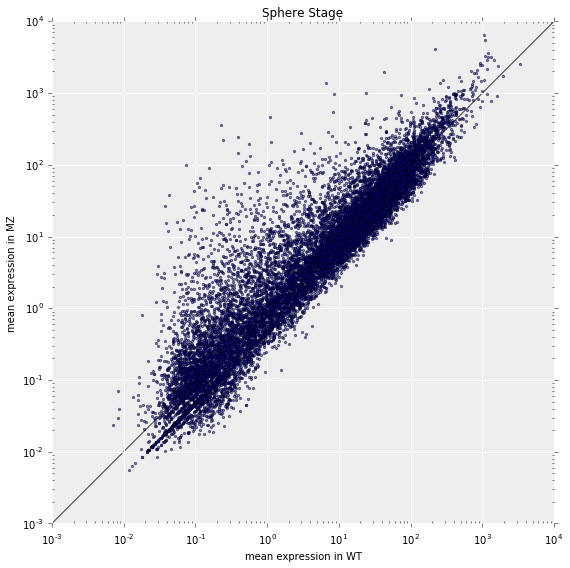

In [50]:
MZ_sphere = np.mean(FPKM.ix[:,0:3],axis=1)
WT_sphere = np.mean(FPKM.ix[:,3:6],axis=1)
#spearman_R,spearman_p = sp.stats.spearmanr(MZ_sphere,WT_sphere)
fig, ax = simple_ax(figsize=(9,9))
ax.set_xlabel('mean expression in WT')
ax.set_ylabel('mean expression in MZ')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Sphere Stage")
ax.scatter(WT_sphere,MZ_sphere,alpha=0.5,s=5)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
#fig.text(0.25,0.8,'Spearman correlation: r=0.75 p=0.0')

In [51]:
bulkCounts_s=counts_shield
design=np.array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
genes=(bulkCounts.index).tolist()

In [52]:
%Rpush bulkCounts_s design genes
%R library(edgeR)
%R library(limma)
%R x <- DGEList(counts=bulkCounts_s, genes=genes)
%R x <- calcNormFactors(x,method="upperquartile")
%R y <- x$samples
%R voomResults <- voom(x,design)
%R lm <- lmFit(voomResults,design)
%R fit <- eBayes(lm)
%R limmaResults_bulk <- topTable(fit,sort="p",n=Inf,coef=2)
CalcNormFactors_bulk_s=com.load_data('y')
LimmaResults_bulk_s = com.load_data('limmaResults_bulk')

In [53]:
CalcNormFactors_bulk_s

,group,lib.size,norm.factors
MZ_shield_1,1,19489860.0,0.849957
MZ_shield_2,1,17021715.0,0.833656
MZ_shield_3,1,10535756.0,0.847380
WT_shield_1,1,6265435.0,1.379172
WT_shield_2,1,6273907.0,0.855107
WT_shield_3,1,11614239.0,1.412209


In [54]:
FPKM_s=bulkCounts_s.copy(deep=True)
for i in range(0,6):
    R=np.sum(bulkCounts_s.iloc[:,i])
    cpm=1e6*(bulkCounts_s.iloc[:,i]+0.5)/(R*CalcNormFactors_bulk_s['norm.factors'][i] + 1)
    FPKM_s.iloc[:,i]=cpm
    FPKM_s.iloc[:,i]=np.divide(cpm*(1e3),counts['Length'])

In [55]:
colors = []
for i in FPKM_s.index:
    if (LimmaResults_bulk_s.ix[i,"adj.P.Val"]<.05) :
        colors.append("red")
    else:
        colors.append("black")

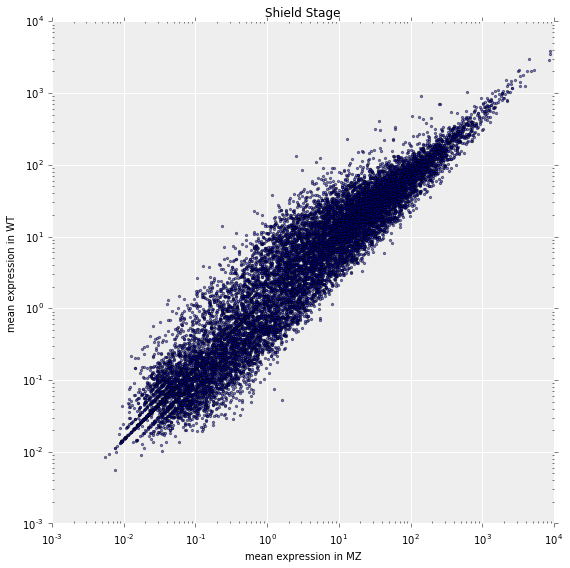

In [56]:
MZ_shield = np.mean(FPKM_s.ix[:,0:3],axis=1)
WT_shield = np.mean(FPKM_s.ix[:,3:6],axis=1)
#spearman_R,spearman_p = sp.stats.spearmanr(MZ_sphere,WT_sphere)
fig, ax = simple_ax(figsize=(9,9))
ax.set_xlabel('mean expression in MZ')
ax.set_ylabel('mean expression in WT')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Shield Stage")
ax.scatter(MZ_shield,WT_shield,alpha=0.5,s=5)
#fig.text(0.25,0.8,'Spearman correlation: r=0.75 p=0.0')

In [4]:
df = pd.read_csv("gene_exp.diff",sep="\t")

In [39]:
df

,test_id,gene_id,gene,locus,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
0,ENSDARG00000000001,ENSDARG00000000001,slc35a5,9:35060459-35093143,WT.sphere,MZn.sphere,OK,2.675310,1.769730,-0.596175,-0.657837,0.33010,0.622499,no
1,ENSDARG00000000002,ENSDARG00000000002,ccdc80,9:35060459-35093143,WT.sphere,MZn.sphere,NOTEST,0.236431,0.120992,-0.966506,0.000000,1.00000,1.000000,no
2,ENSDARG00000000018,ENSDARG00000000018,nrf1,4:14146776-14169064,WT.sphere,MZn.sphere,OK,50.632900,55.155000,0.123418,0.243844,0.72070,0.883481,no
3,ENSDARG00000000019,ENSDARG00000000019,ube2h,4:14076732-14125268,WT.sphere,MZn.sphere,OK,51.072500,42.394200,-0.268681,-0.470471,0.44625,0.716838,no
4,ENSDARG00000000068,ENSDARG00000000068,slc9a3r1,12:34979365-35032034,WT.sphere,MZn.sphere,OK,36.734000,40.616000,0.144933,0.216669,0.70480,0.874955,no
5,ENSDARG00000000069,ENSDARG00000000069,dap,24:22678237-22711533,WT.sphere,MZn.sphere,OK,35.447600,29.220400,-0.278713,-0.230023,0.69245,0.868337,no
6,ENSDARG00000000086,ENSDARG00000000086,itsn1,1:47492920-47602321,WT.sphere,MZn.sphere,OK,21.979600,19.772200,-0.152692,-0.146557,0.75300,0.898841,no
7,ENSDARG00000000102,ENSDARG00000000102,musk,10:13048112-13142776,WT.sphere,MZn.sphere,NOTEST,0.063486,0.000000,-inf,0.000000,1.00000,1.000000,no
8,ENSDARG00000000103,ENSDARG00000000103,myh10,6:7469899-7575100,WT.sphere,MZn.sphere,OK,20.248900,19.567000,-0.049421,-0.061839,0.90025,0.960232,no
9,ENSDARG00000000142,ENSDARG00000000142,C10H5orf28,10:13242844-13255059,WT.sphere,MZn.sphere,OK,4.432510,5.357520,0.273439,0.227606,0.71930,0.882889,no


In [23]:
df_new = df[(df["value_1"]!=0) & (df["value_2"]!=0)]

In [32]:
MZ_shield = [i+(.001) for i in df["value_2"]]
WT_shield = [i+(.001) for i in df["value_1"]]

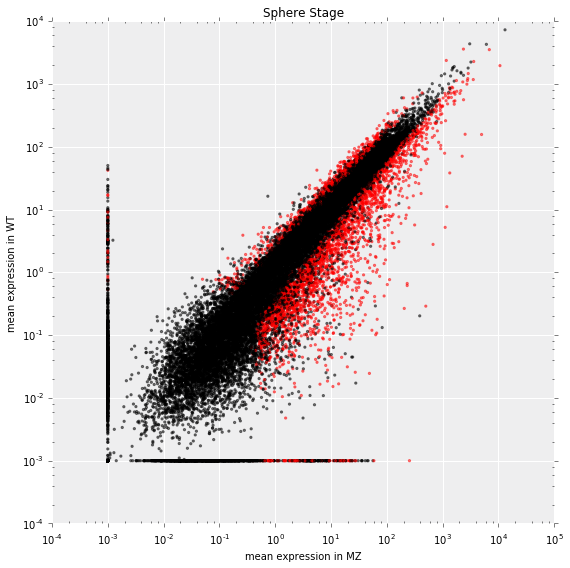

In [40]:
#MZ_shield =np.array(df_new["value_2"])
#WT_shield = np.array(df_new["value_1"])
#spearman_R,spearman_p = sp.stats.spearmanr(MZ_sphere,WT_sphere)
fig, ax = simple_ax(figsize=(9,9))
ax.set_xlabel('mean expression in MZ')
ax.set_ylabel('mean expression in WT')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Sphere Stage")
ax.scatter(MZ_shield,WT_shield,alpha=0.5,s=5,color=["black" if i >.05 else "red" for i in df["p_value"]])

In [42]:
fw = pd.read_csv("NIHMS521574-supplement-11.txt",sep="\t",comment="#")

In [44]:
first_wave = fw[fw["First_wave_5rpkm"] == "X"]

In [72]:
test = df.set_index("gene_id")

In [80]:
df_fw = test.ix[first_wave.Gene_id,:]

In [81]:
MZ_shield = [i+(.001) for i in df_fw["value_2"]]
WT_shield = [i+(.001) for i in df_fw["value_1"]]

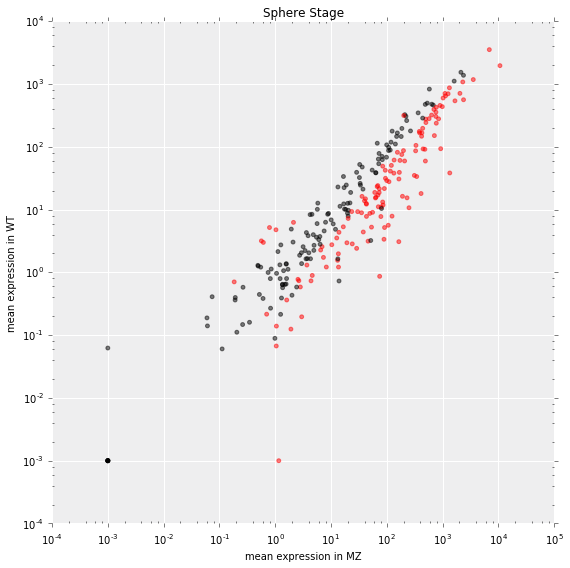

In [83]:
fig, ax = simple_ax(figsize=(9,9))
ax.set_xlabel('mean expression in MZ')
ax.set_ylabel('mean expression in WT')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Sphere Stage")
ax.scatter(MZ_shield,WT_shield,alpha=0.5,s=15,color=["black" if i >.05 else "red" for i in df_fw["p_value"]])